Calculate Prediction
Confidence Intervals
for a Linear
Regression Model

   Hours  Marks
0      1     45
1      2     48
2      3     52
3      4     61
4      5     65
                            OLS Regression Results                            
Dep. Variable:                  Marks   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     275.7
Date:                Tue, 25 Nov 2025   Prob (F-statistic):           3.04e-06
Time:                        18:36:25   Log-Likelihood:                -14.791
No. Observations:                   8   AIC:                             33.58
Df Residuals:                       6   BIC:                             33.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

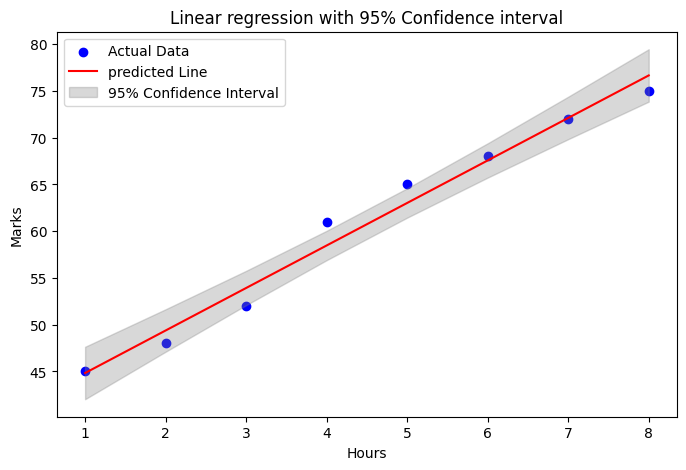

In [1]:
import pandas as pd # Import pandas for data manipulation
import numpy as np # Import numpy for numerical operations
import matplotlib.pyplot as plt # Import matplotlib for plotting
import statsmodels.api as sm # Import statsmodels for statistical modeling

# Create a dictionary with data for hours studied and marks obtained
data = {
    'Hours': [1, 2, 3, 4, 5, 6, 7, 8],
    'Marks': [45, 48, 52, 61, 65, 68, 72, 75] # Added one more mark to match the number of hours
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)
print(df.head()) # Print the first few rows of the DataFrame

# Define independent variable (Hours) and dependent variable (Marks)
X = df['Hours']
y = df['Marks']

# Add a constant to the independent variable for the intercept in the regression model
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) model
model = sm.OLS(y, X).fit()
print(model.summary()) # Print the summary of the regression results

# Get predictions and confidence intervals from the model
pred = model.get_prediction(X)
conf_int = pred.conf_int(alpha=0.05) # Calculate 95% confidence intervals
predicted = model.predict(X) # Get the predicted values

# Create a result DataFrame to store actual, predicted, and confidence interval values
result = df.copy()
result['Predicted'] = predicted # Add predicted values to the result DataFrame
result['Lower_cp'] = conf_int[:, 0] # Add the lower bounds of the confidence intervals
result['Upper_cp'] = conf_int[:, 1] # Add the upper bounds of the confidence intervals

print(result.head()) # Print the first few rows of the result DataFrame

# Create a plot to visualize the results
plt.figure(figsize=(8,5)) # Set the figure size for the plot
plt.scatter(df['Hours'], df['Marks'], color='blue', label='Actual Data') # Plot actual data points
plt.plot(df['Hours'], predicted, color='red', label='predicted Line') # Plot the regression line
plt.fill_between(df['Hours'], result['Lower_cp'],result['Upper_cp'], color='gray', alpha=0.3, label='95% Confidence Interval') # Fill the area for the confidence interval
plt.xlabel('Hours') # Set the x-axis label
plt.ylabel('Marks') # Set the y-axis label
plt.title('Linear regression with 95% Confidence interval') # Set the title of the plot
plt.legend() # Display the legend
plt.show() # Show the plot